분포: 확률적 데이터의 발생 빈도에 대한 정보
- 범주형데이터: count plot
- 실수형 데이터: histogram(seaborn 패키지의 distplot)

In [1]:
np.random.seed(0)
x = np.random.normal(size=21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

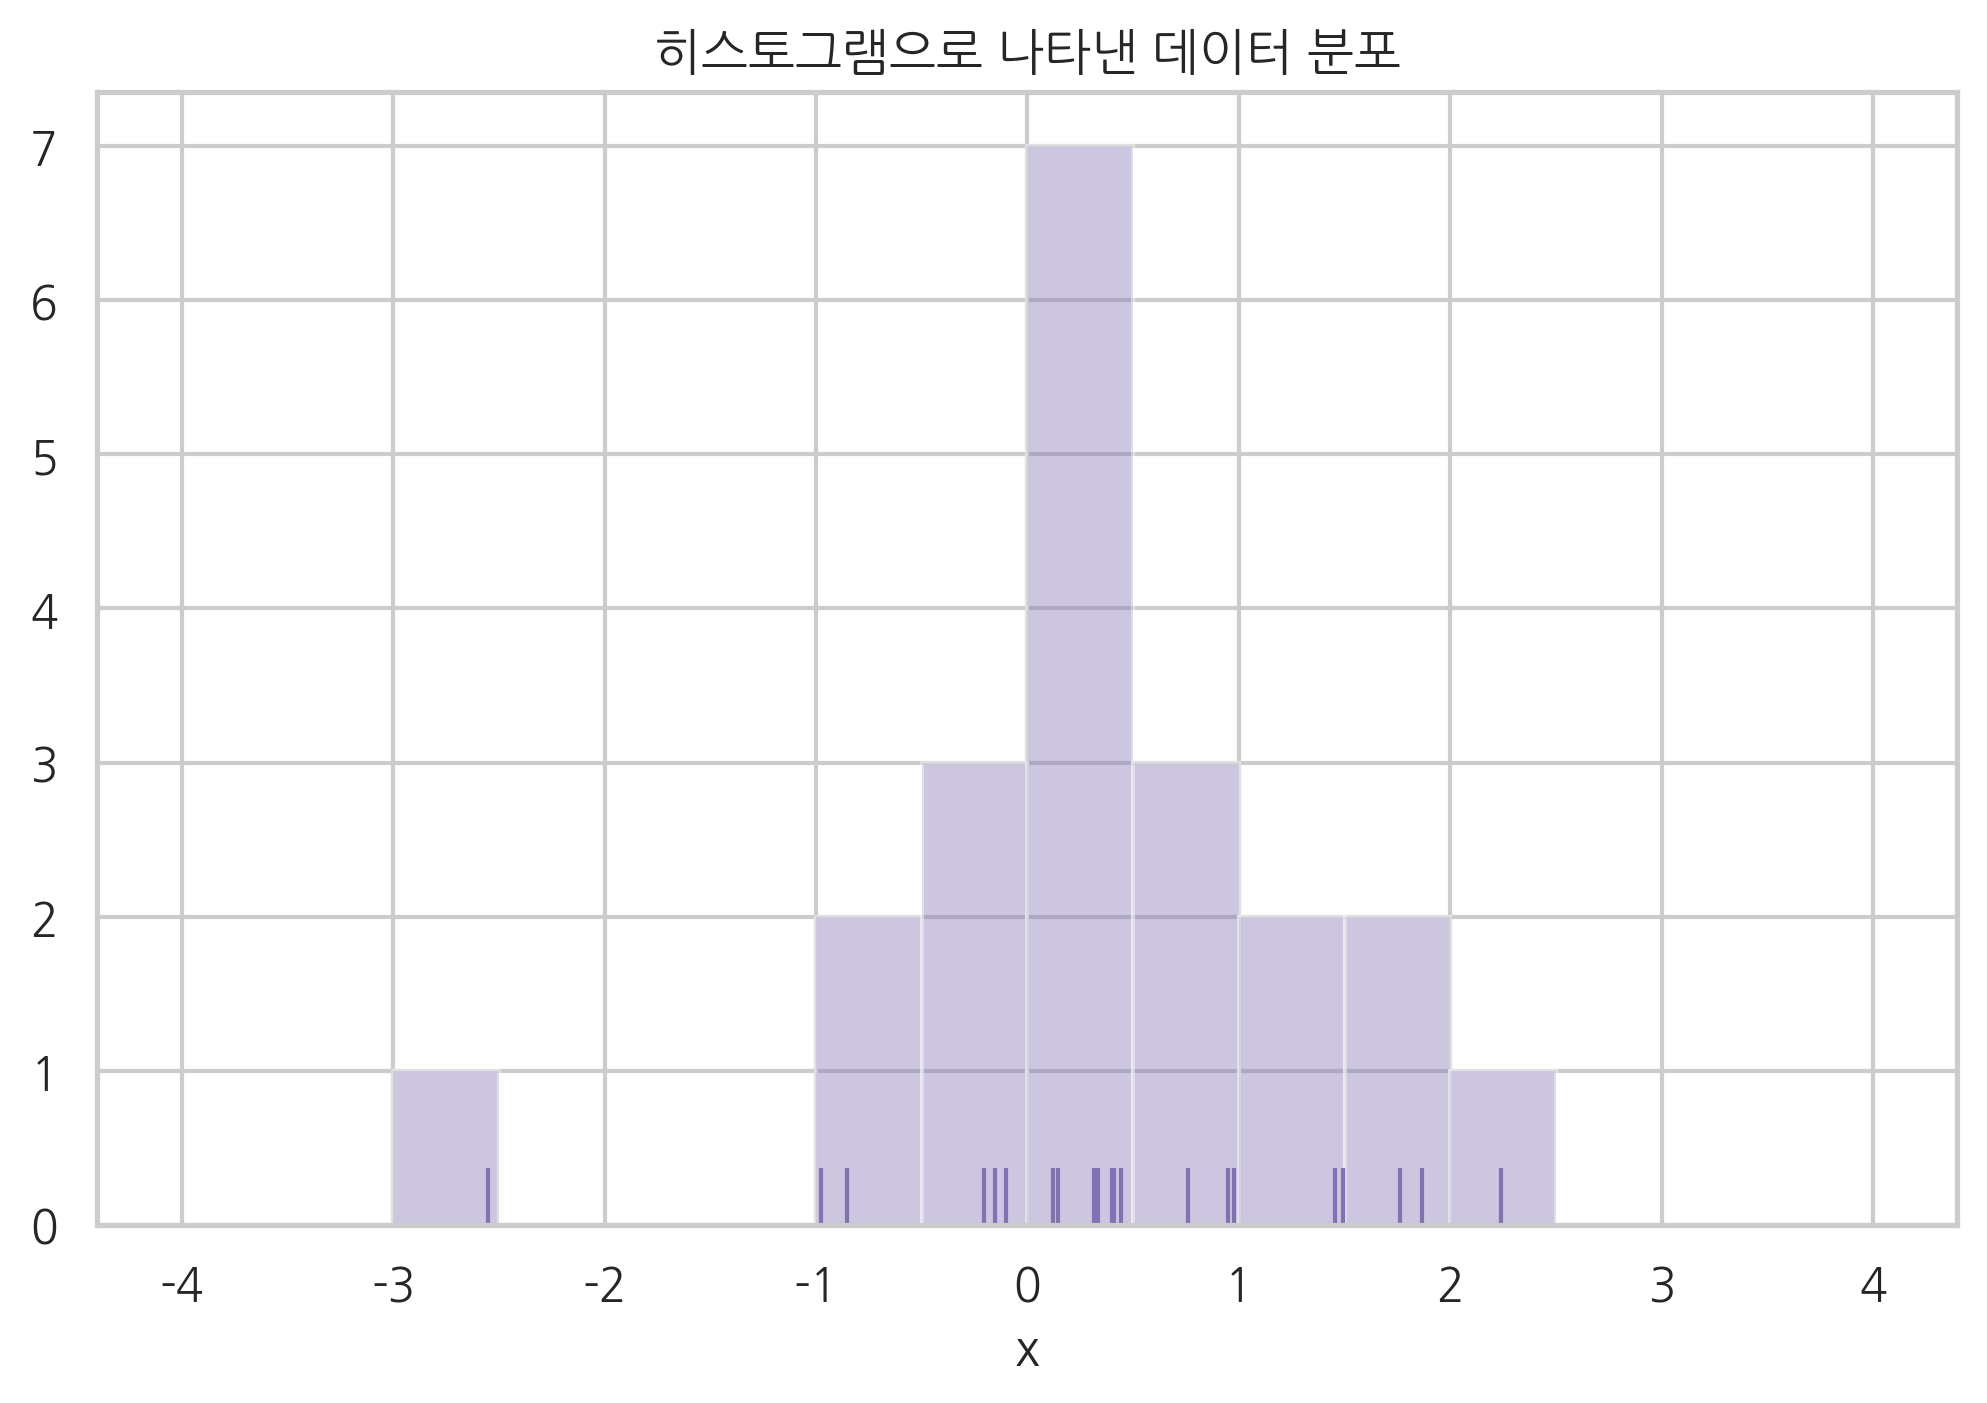

In [11]:
bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins, color='m')
plt.title('히스토그램으로 나타낸 데이터 분포')
plt.xlabel('x')
plt.show()

기술통계 대푯값 계산
- mean(): 표본평균
- median(): 표본중앙값
- argmax(): 이산데이터의 최댓값
- histogram(): 데이터를 구간으로 나누어 각 구간에 들어가는 데이터 개수 계산

In [12]:
print(f'표본평균 = {np.mean(x)}, 표본중앙값 = {np.median(x)}')

표본평균 = 0.4206524782418389, 표본중앙값 = 0.4001572083672233


In [15]:
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print(f'최빈구간 = {bins[m_bin]} ~ {bins[m_bin + 1]}')

최빈구간 = 0.0 ~ 0.5


In [21]:
pd.DataFrame([ns, _])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,7.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,NaN
1,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0


In [23]:
np.random.seed(0)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

In [24]:
sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

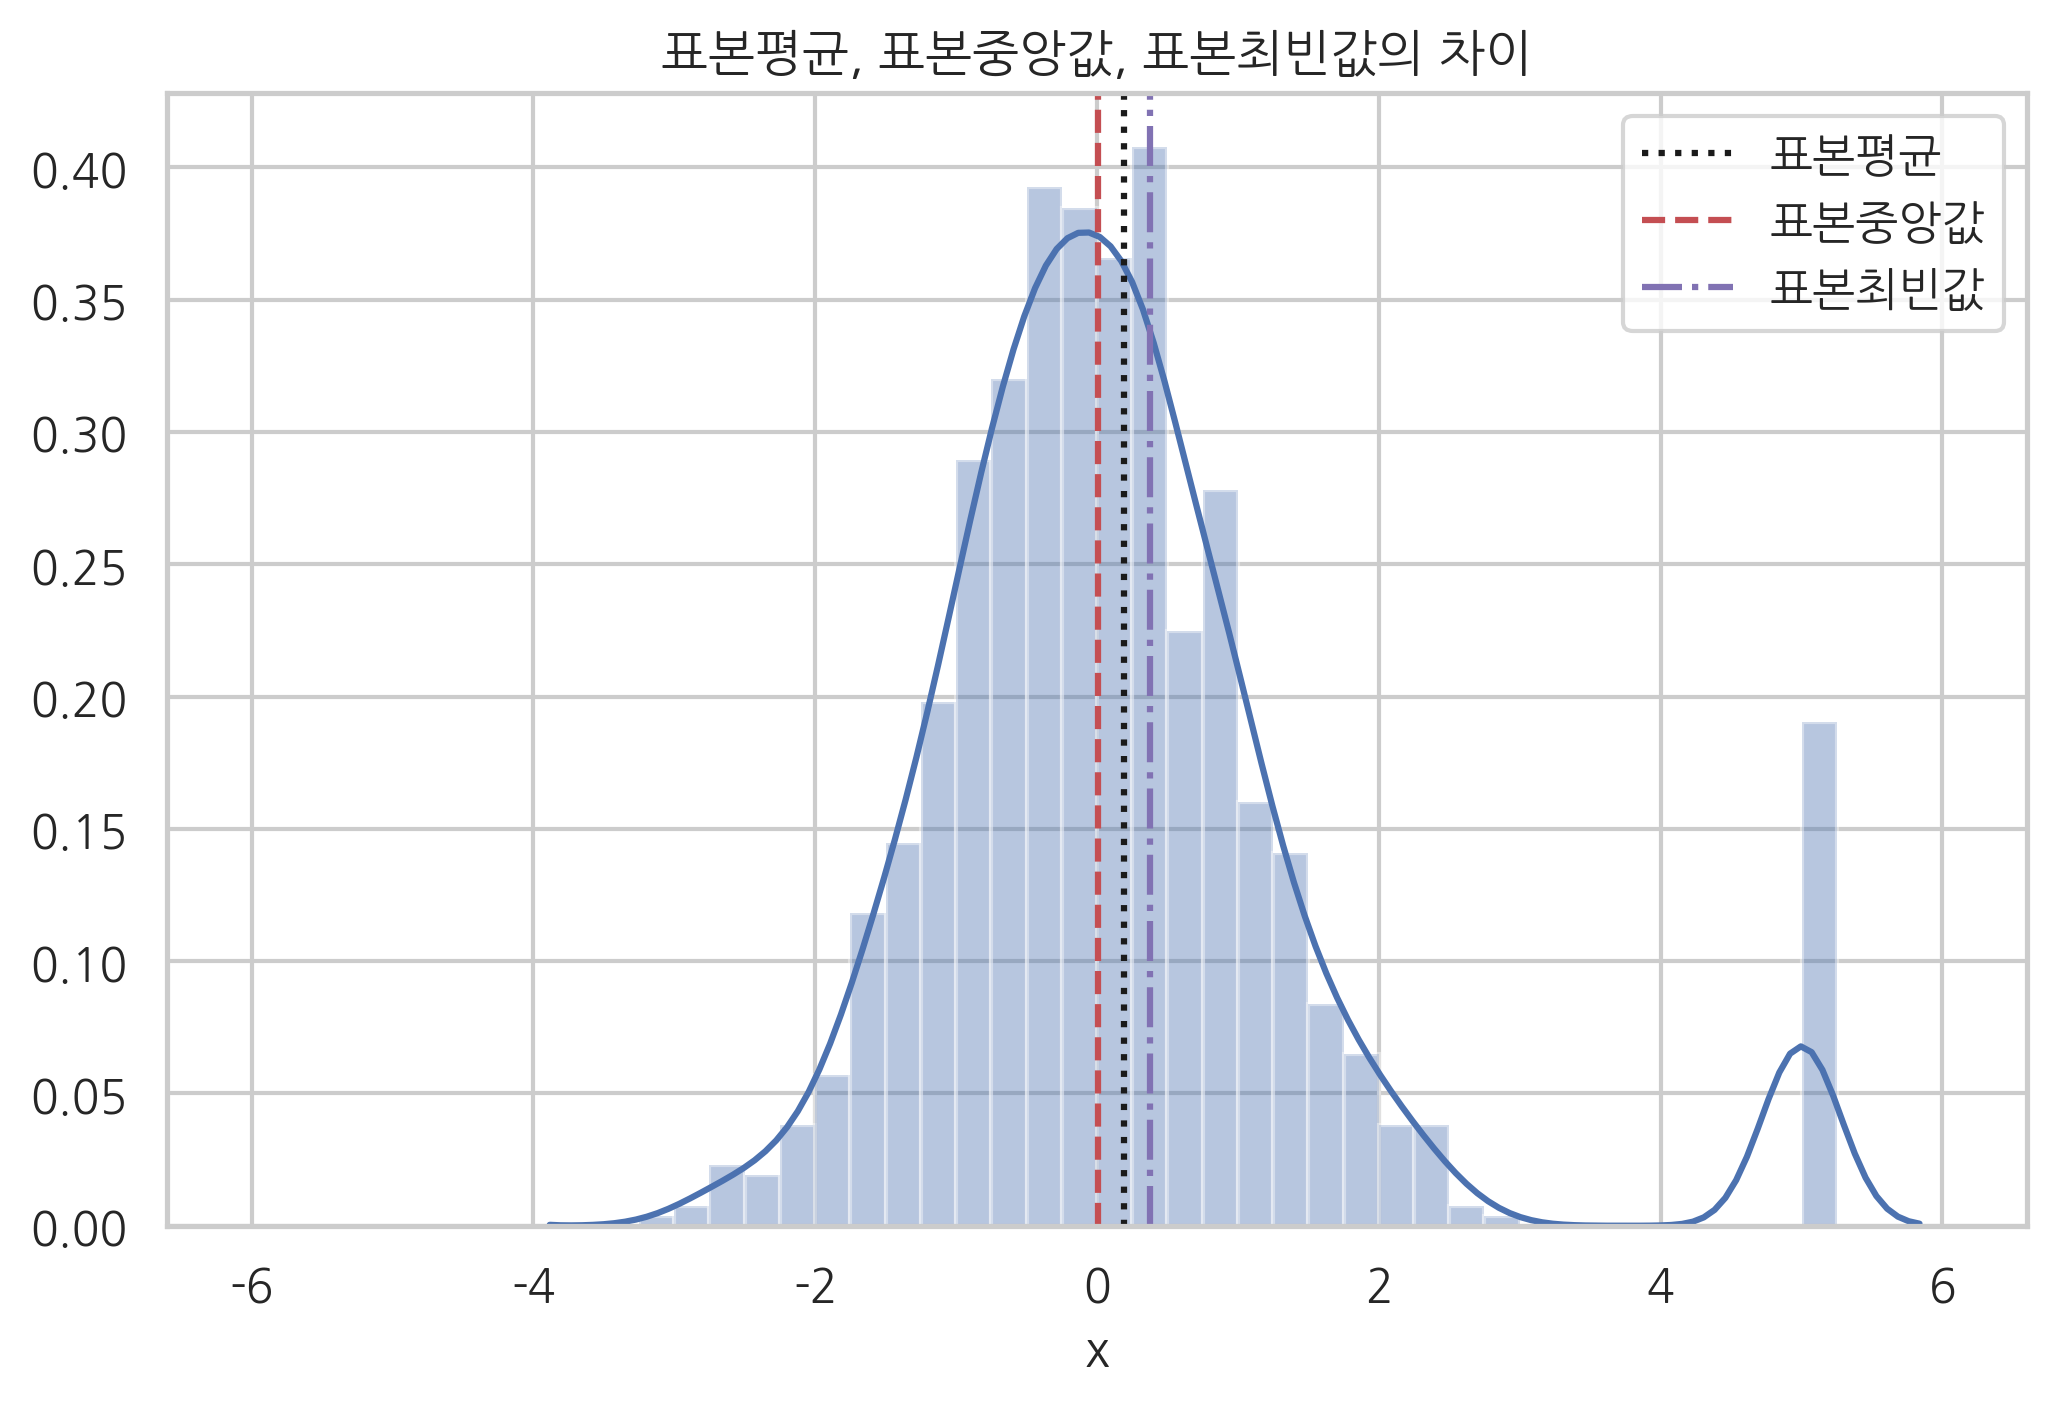

In [26]:
sns.distplot(x, bins=bins)
plt.axvline(sample_mean, c='k', ls=':', label='표본평균')
plt.axvline(sample_median, c='r', ls='--', label='표본중앙값')
plt.axvline(sample_mode, c='m', ls='-.', label='표본최빈값')
plt.title('표본평균, 표본중앙값, 표본최빈값의 차이')
plt.xlabel('x')
plt.legend()
plt.show()

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype='category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

In [46]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
data = df['petal length (cm)']
data

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

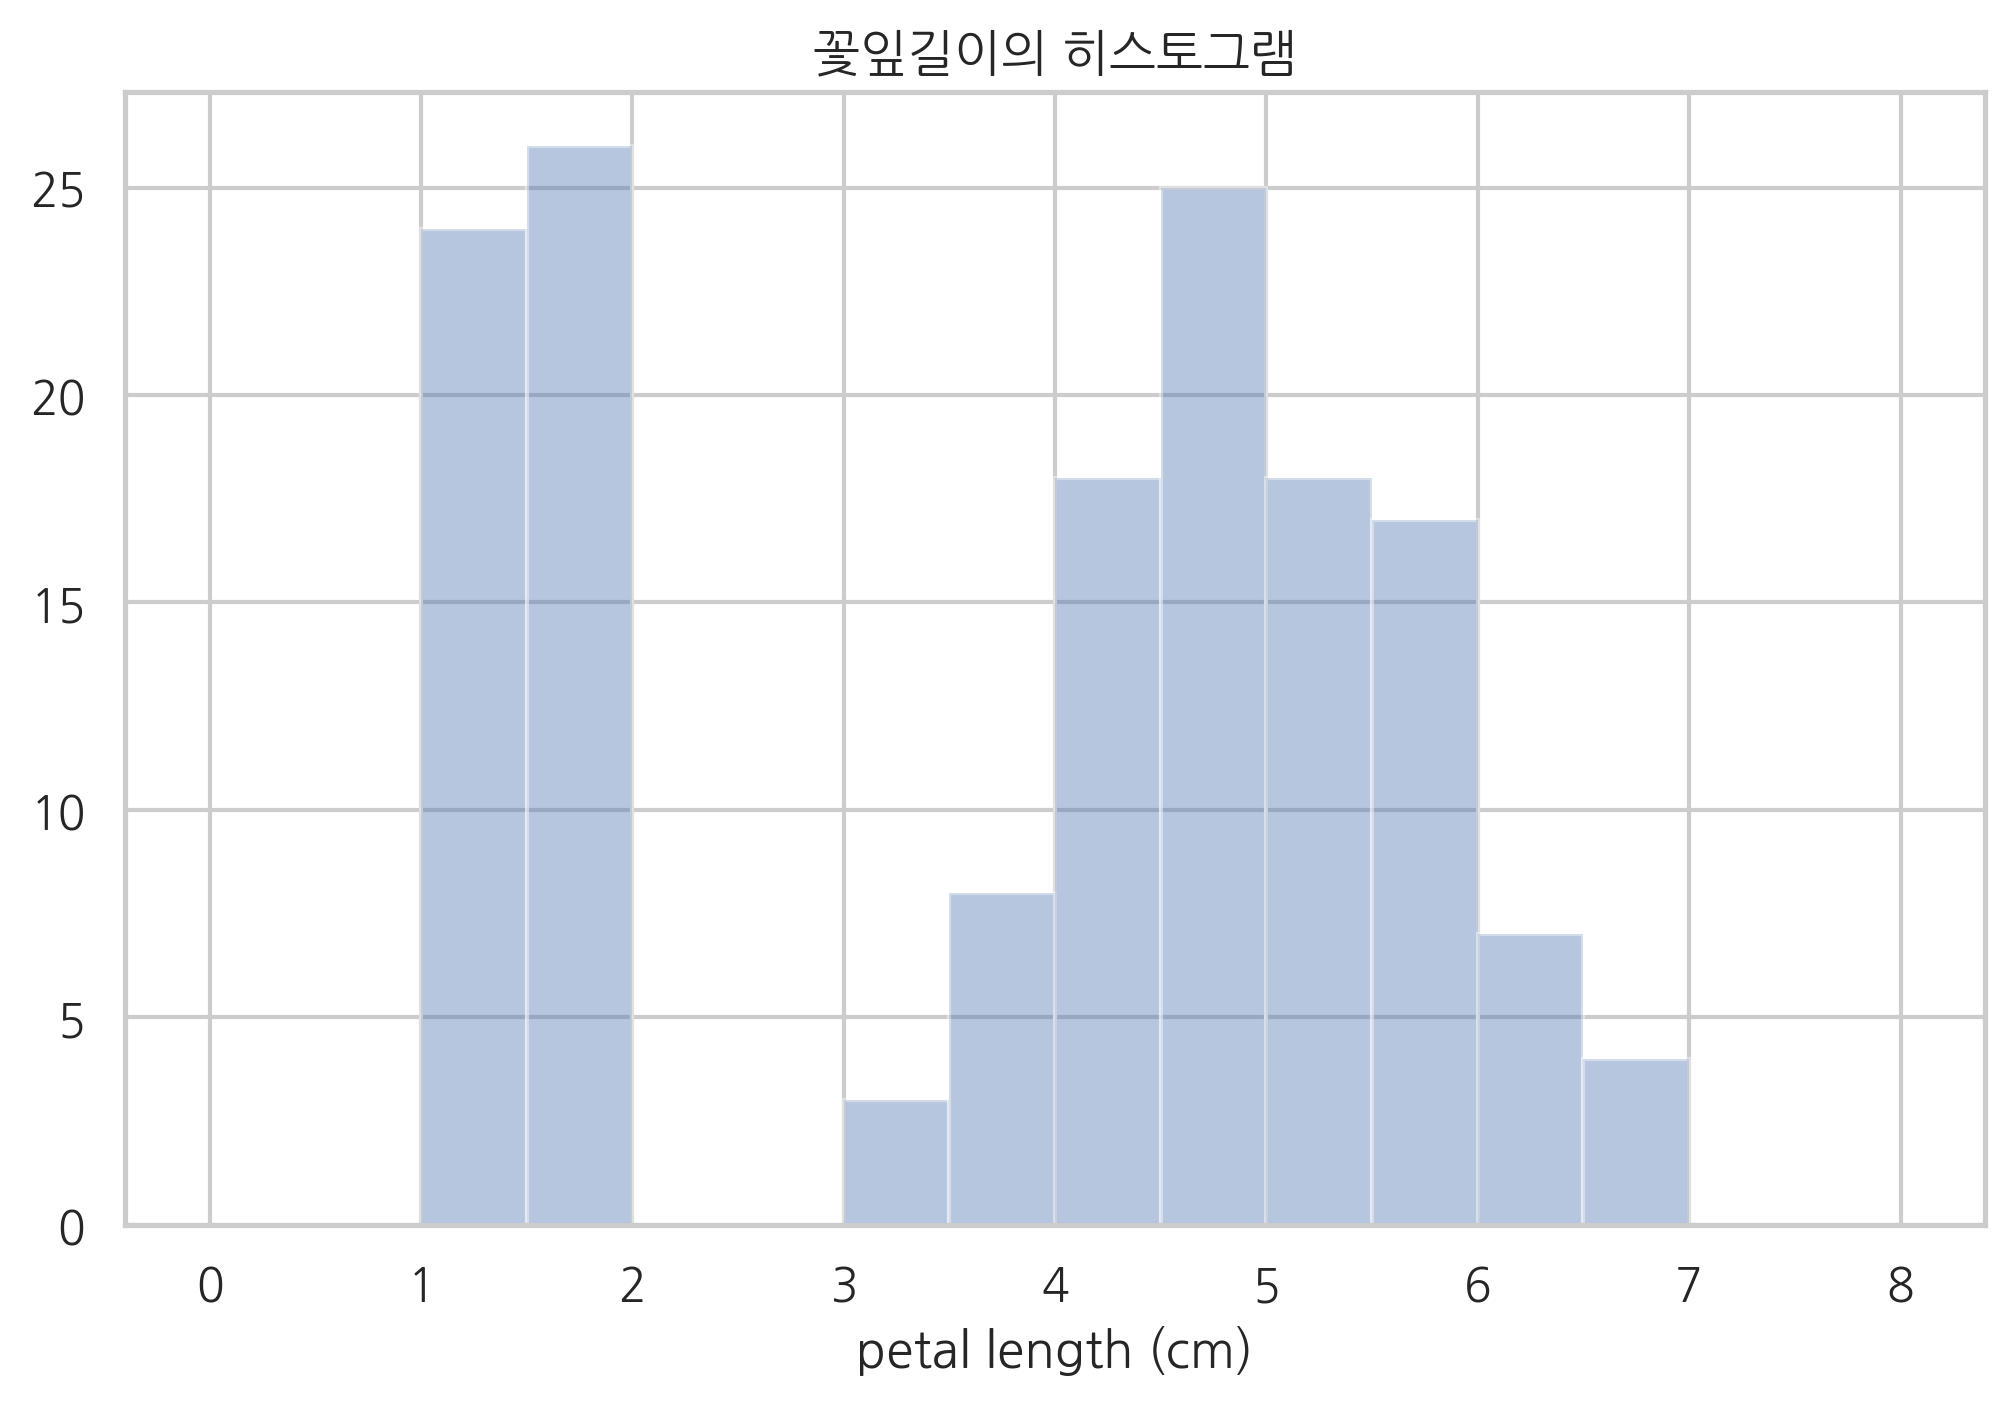

In [53]:
bins = np.linspace(0, 8, 17)
sns.distplot(data, kde=False, bins=bins)
plt.title('꽃잎길이의 히스토그램')
plt.show()
# 꽃잎의 길이: 다봉분포

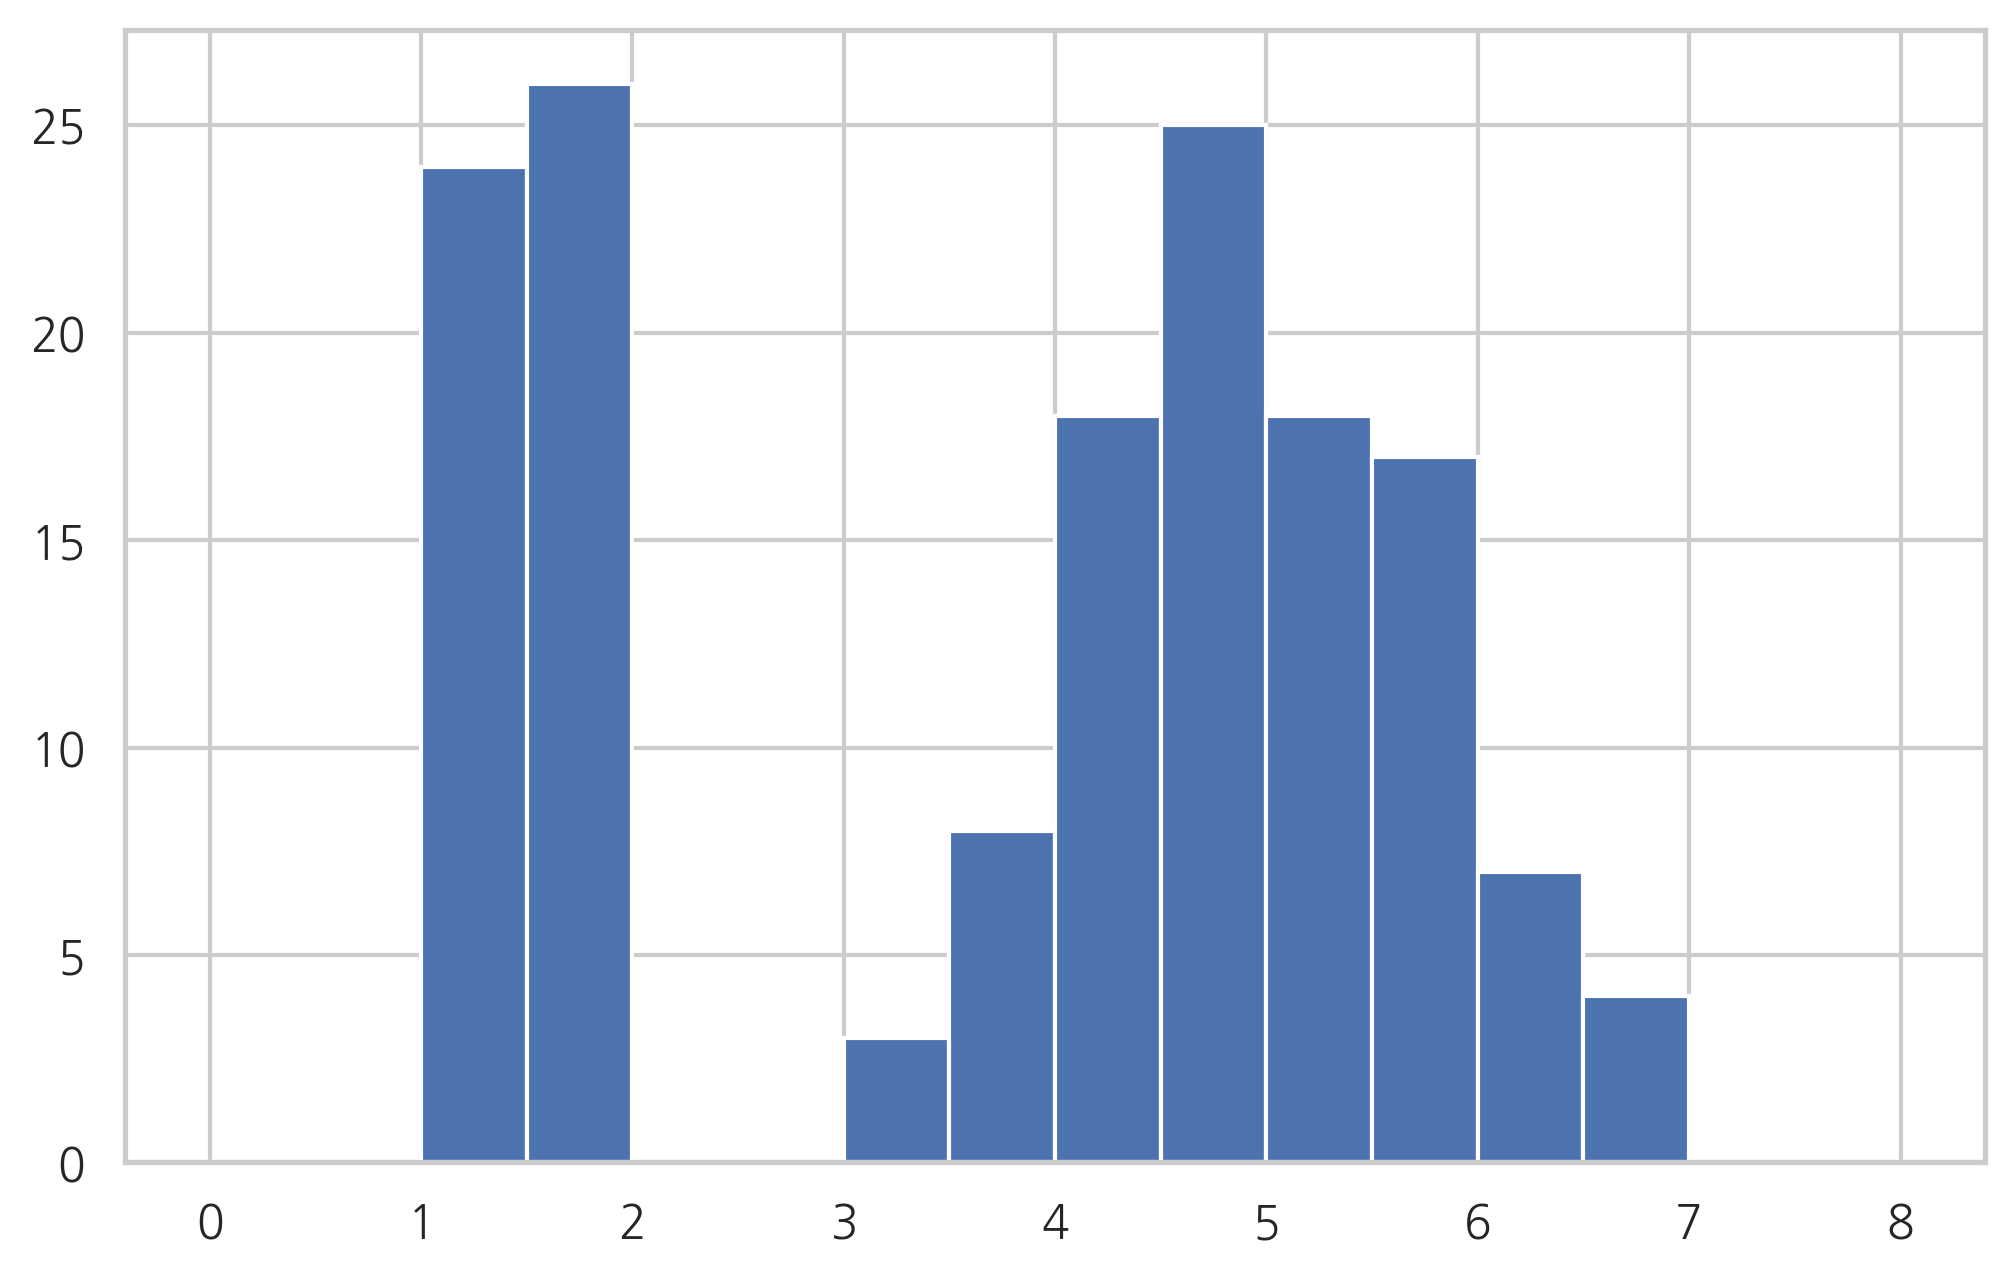

In [54]:
data.hist(bins=bins)
plt.show()

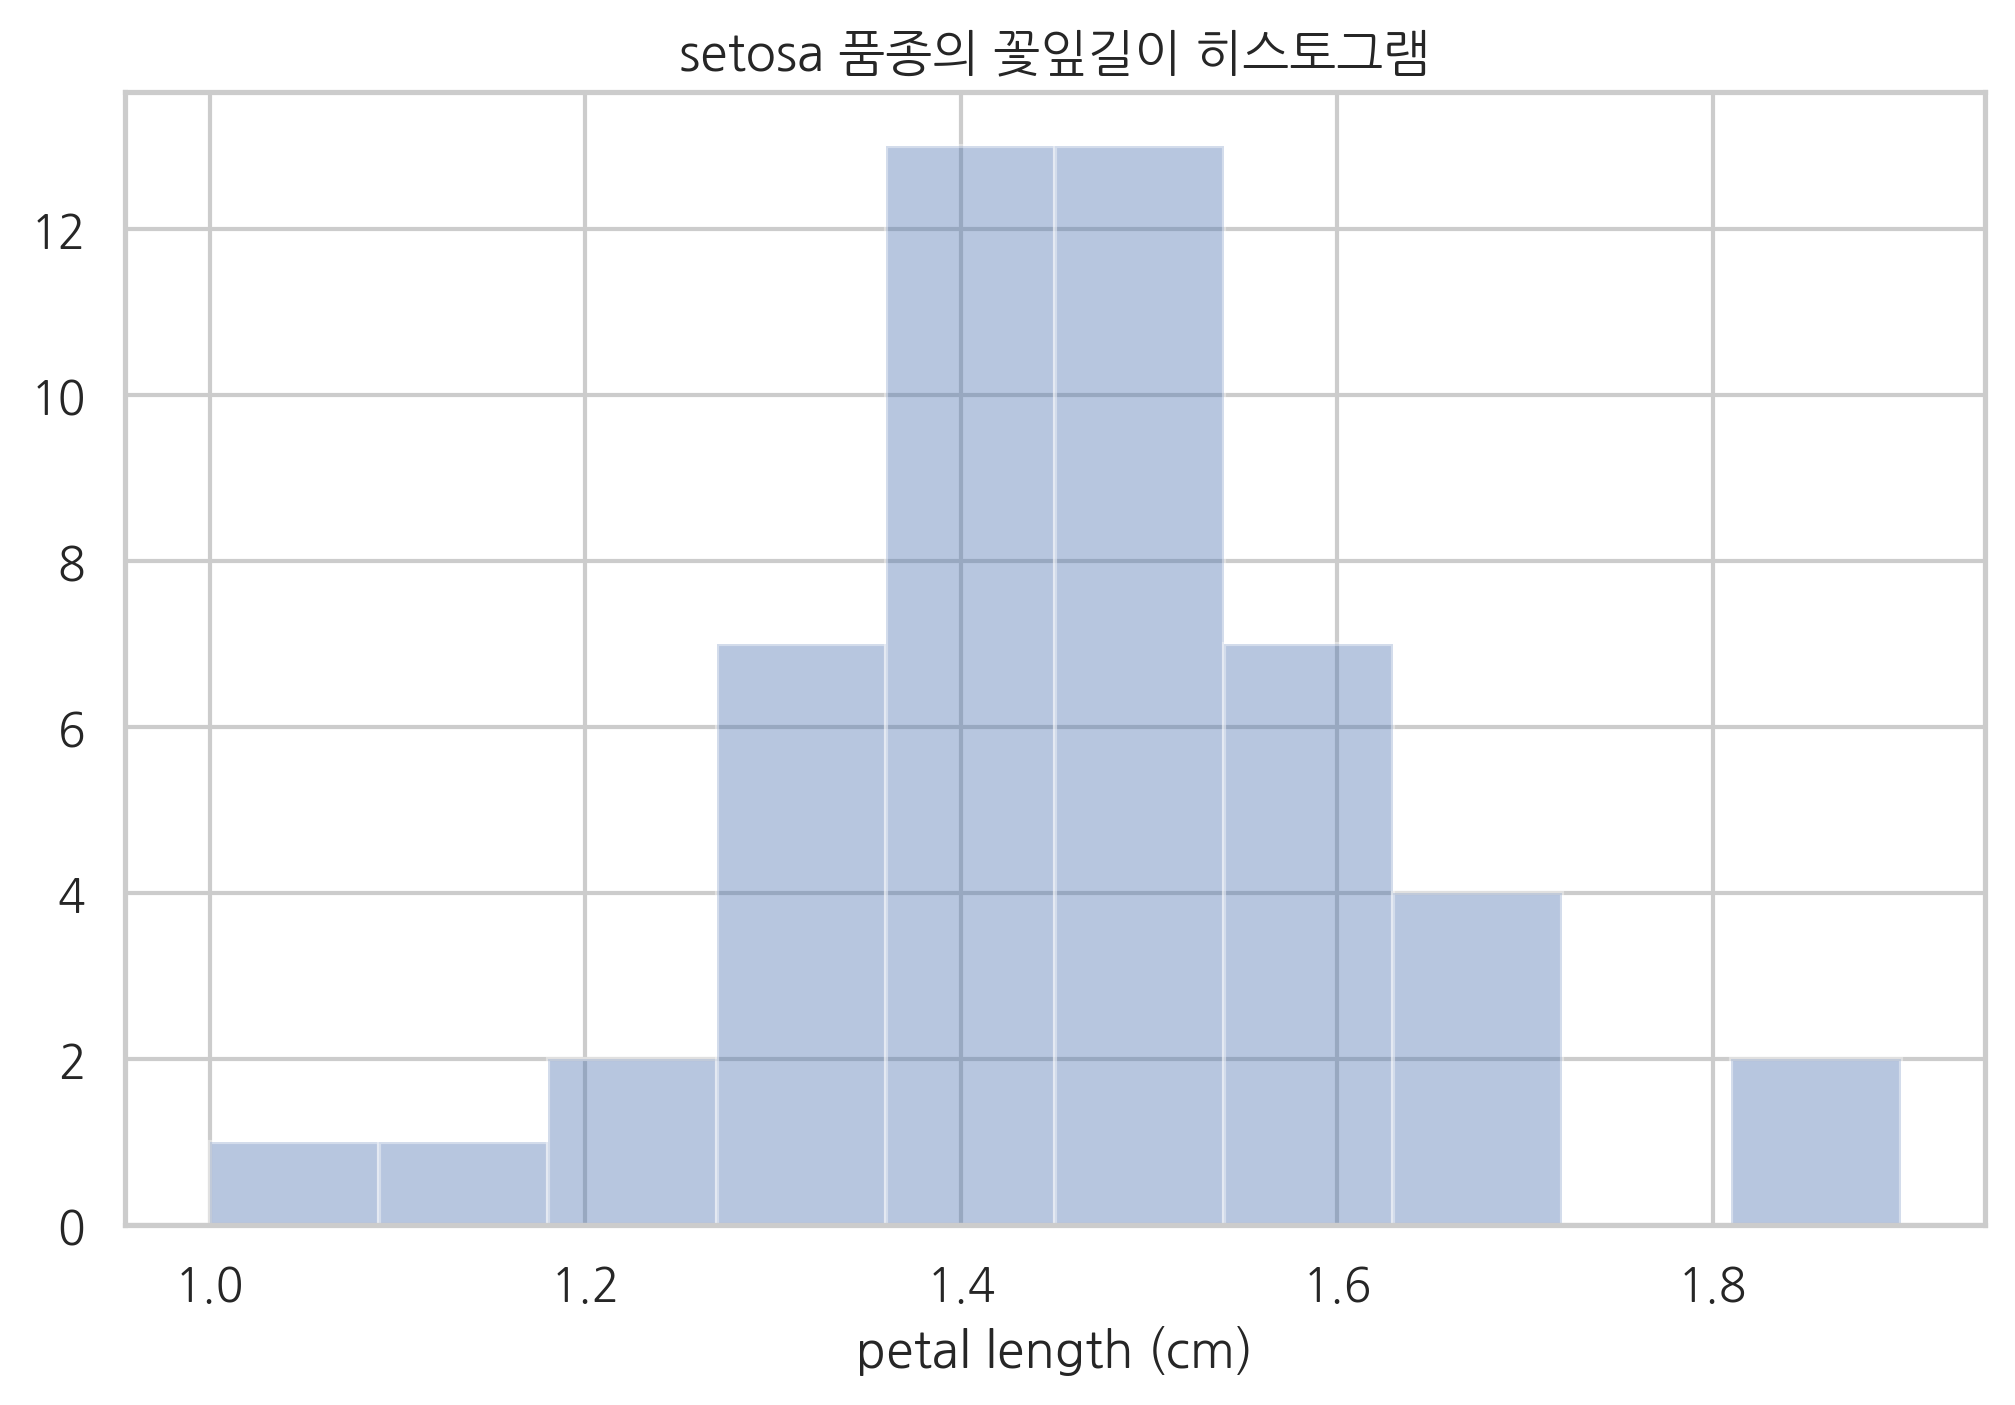

In [55]:
data1 = df['petal length (cm)'][sy=='setosa']
sns.distplot(data1, kde=False)
plt.title('setosa 품종의 꽃잎길이 히스토그램')
plt.show()

표본평균: 5.552, 표본중앙값: 5.55, 표본최빈값: 5.5


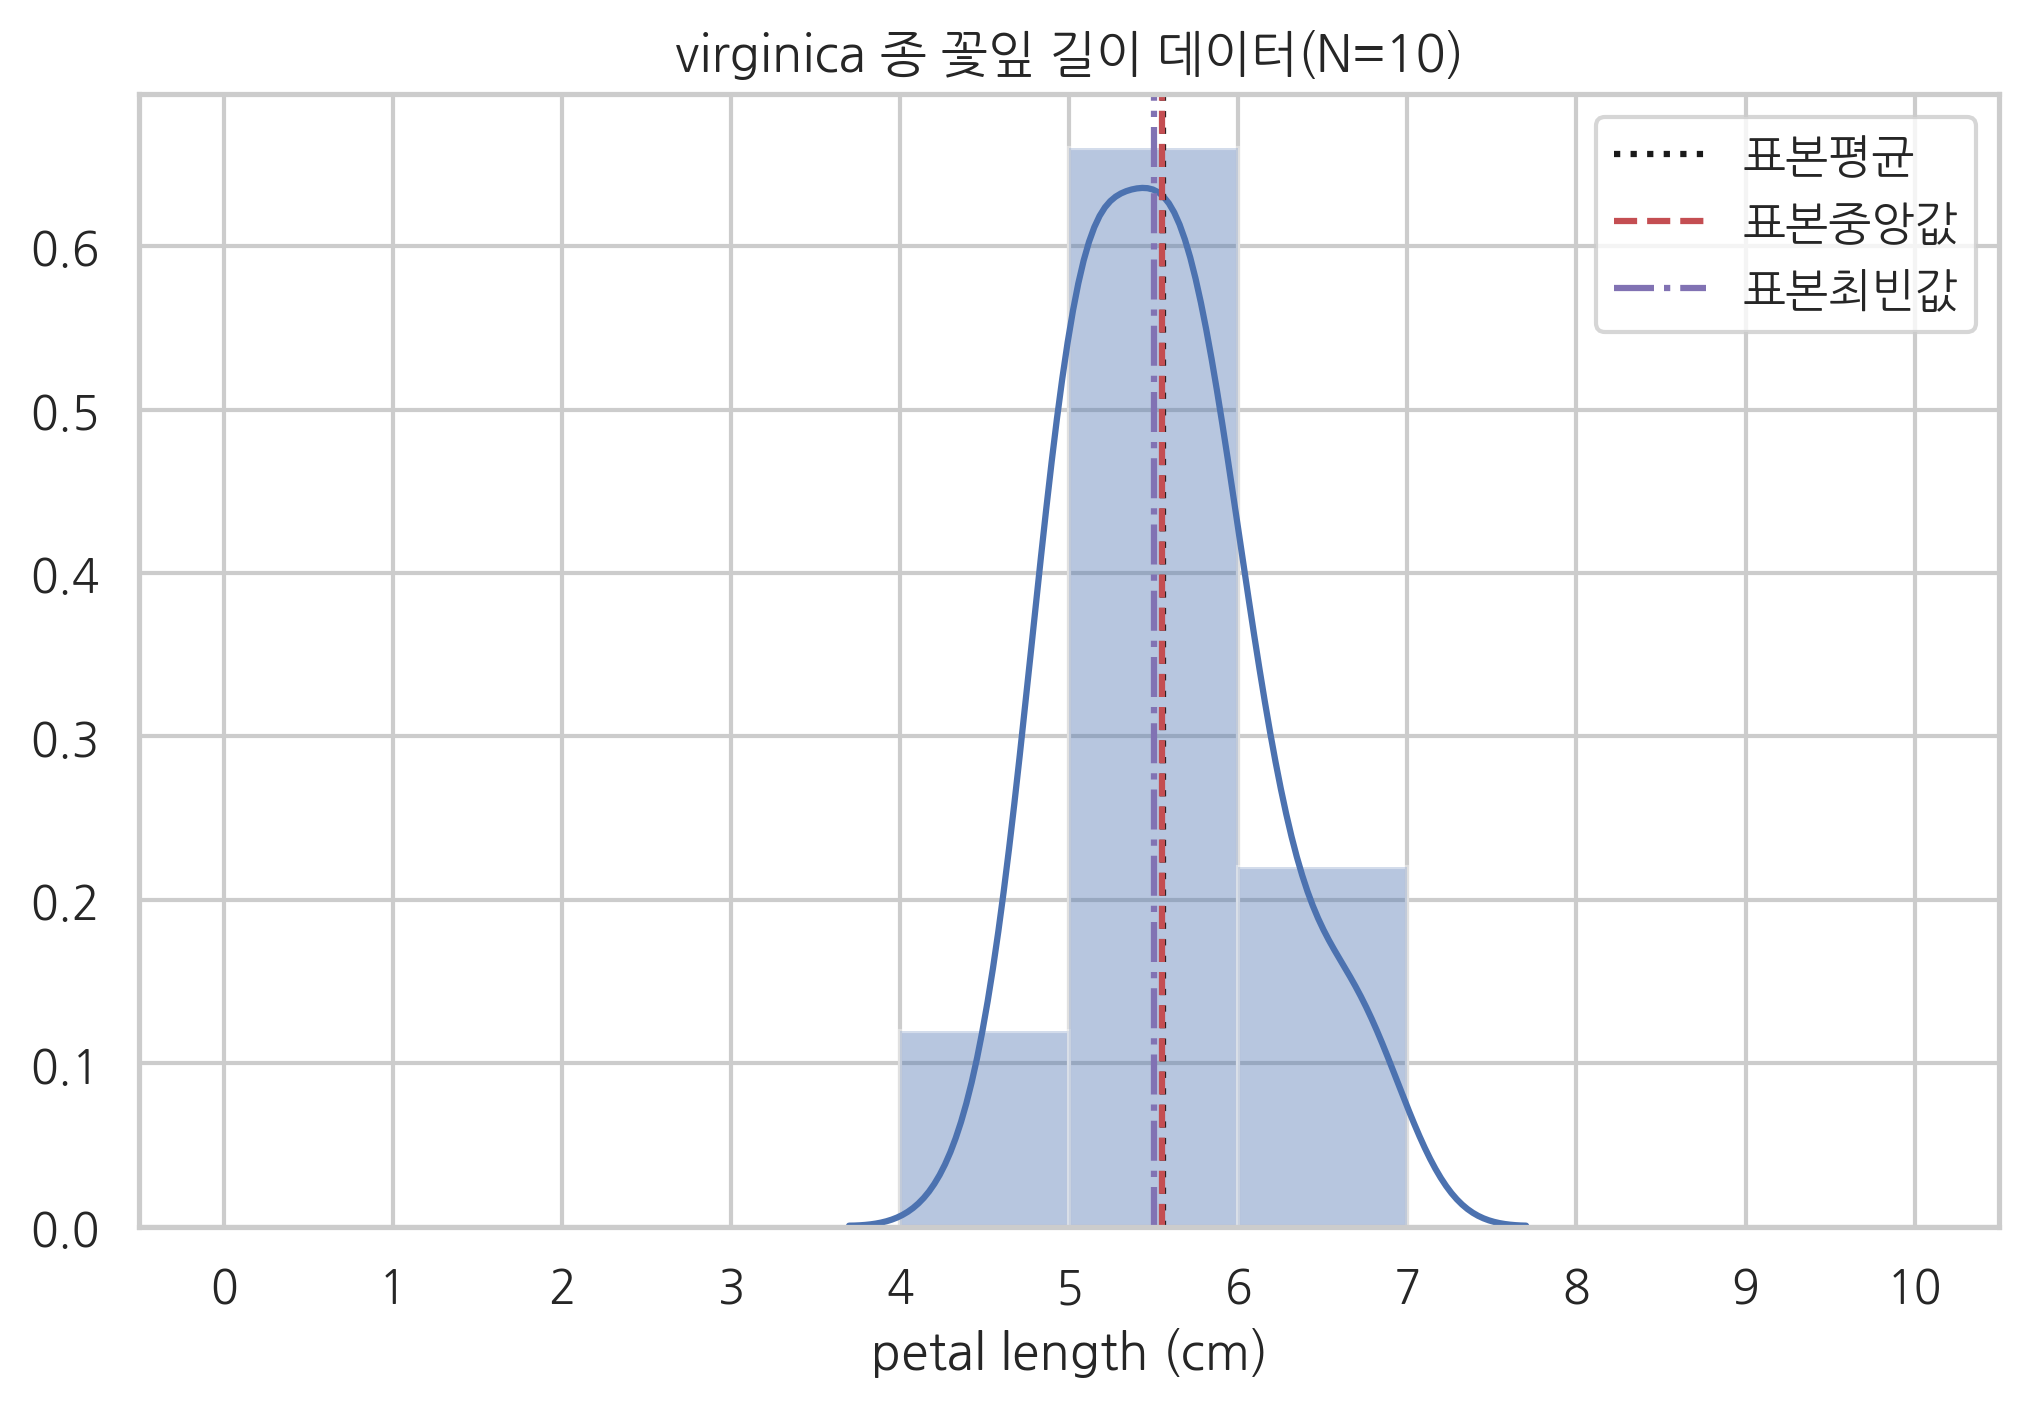

In [69]:
# virginica 종 꽃잎 길이
data2 = df['petal length (cm)'][sy=='virginica']
s_mean = np.mean(data2)
s_median = np.median(data2)

bins = np.linspace(0, 10, 11)
ns, _ = np.histogram(data2, bins=bins)
s_mode = (bins[np.argmax(ns)] + bins[np.argmax(ns) + 1]) * 0.5
print(f'표본평균: {s_mean}, 표본중앙값: {s_median}, 표본최빈값: {s_mode}')

sns.distplot(data2, bins=bins)
plt.xticks(bins)
plt.title('virginica 종 꽃잎 길이 데이터(N=10)')
plt.axvline(s_mean, c='k', ls=':', label='표본평균')
plt.axvline(s_median, c='r', ls='--', label='표본중앙값')
plt.axvline(s_mode, c='m', ls='-.', label='표본최빈값')
plt.legend()
plt.show()

In [112]:
data2 = df['petal length (cm)'][sy=='virginica']

def get_sample_mode(data, n):
    bins = np.linspace(0, 10, n+1)
    ns, _ = np.histogram(data, bins=bins)
    s_mode = (bins[np.argmax(ns)] + bins[np.argmax(ns) + 1]) * 0.5
    print(f'구간의 수: {n}')
    print(f'표본평균: {s_mean}, 표본중앙값: {s_median}, 표본최빈값: {s_mode}')
    
    sns.distplot(data, bins=bins)
    plt.axvline(s_mean, c='k', ls=':', label='표본평균')
    plt.axvline(s_median, c='r', ls='--', label='표본중앙값')
    plt.axvline(s_mode, c='m', ls='-.', label='표본최빈값')
    plt.legend()
    plt.show()

구간의 수: 50
표본평균: 5.552, 표본중앙값: 5.55, 표본최빈값: 5.5


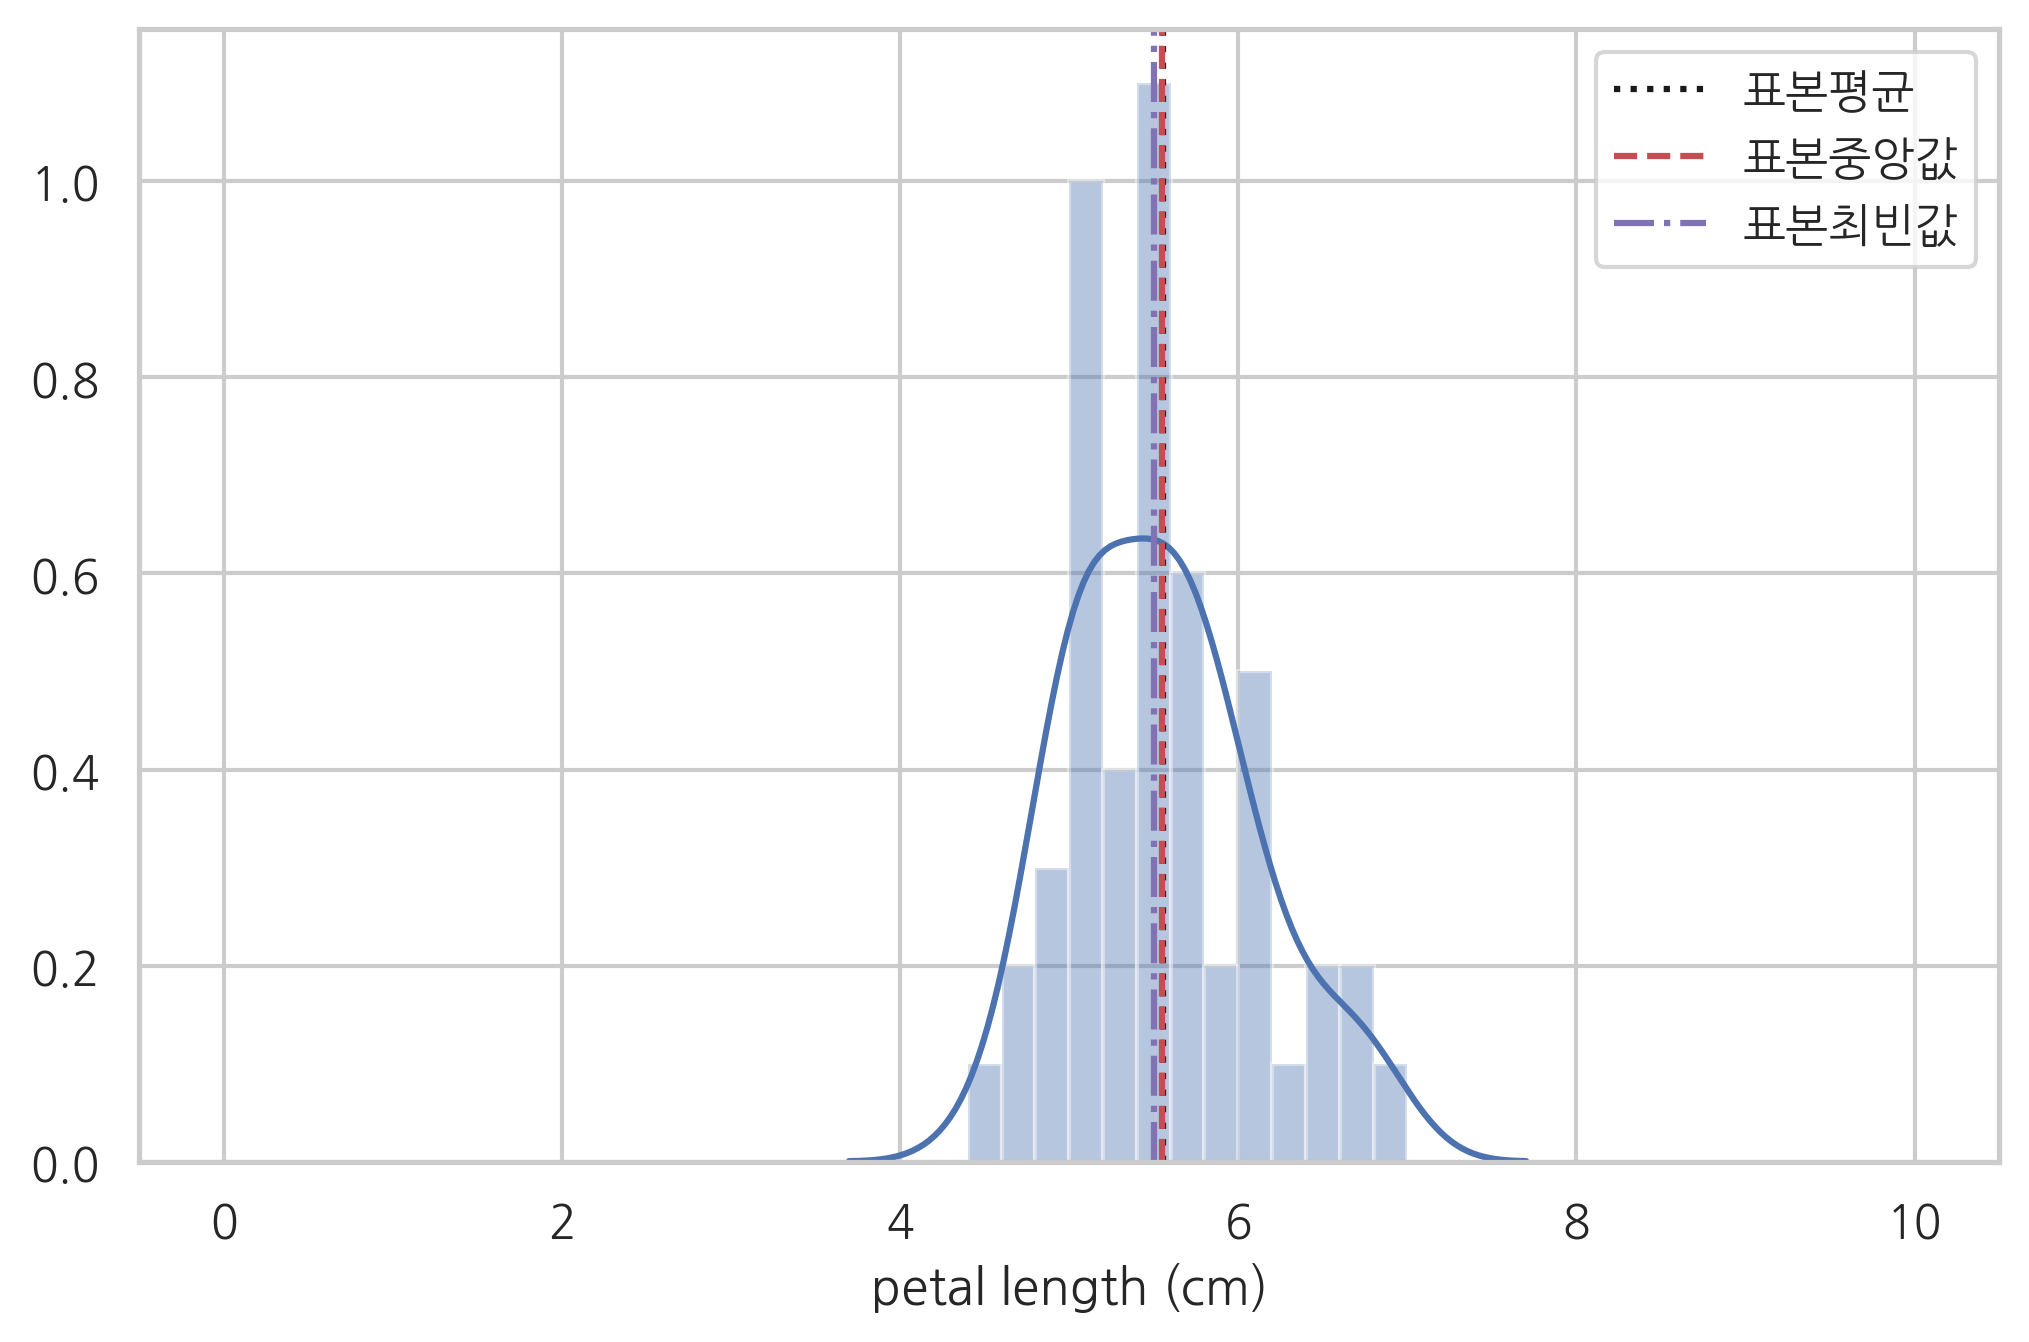

In [113]:
get_sample_mode(data2, 50)

구간의 수: 100
표본평균: 5.552, 표본중앙값: 5.55, 표본최빈값: 5.050000000000001


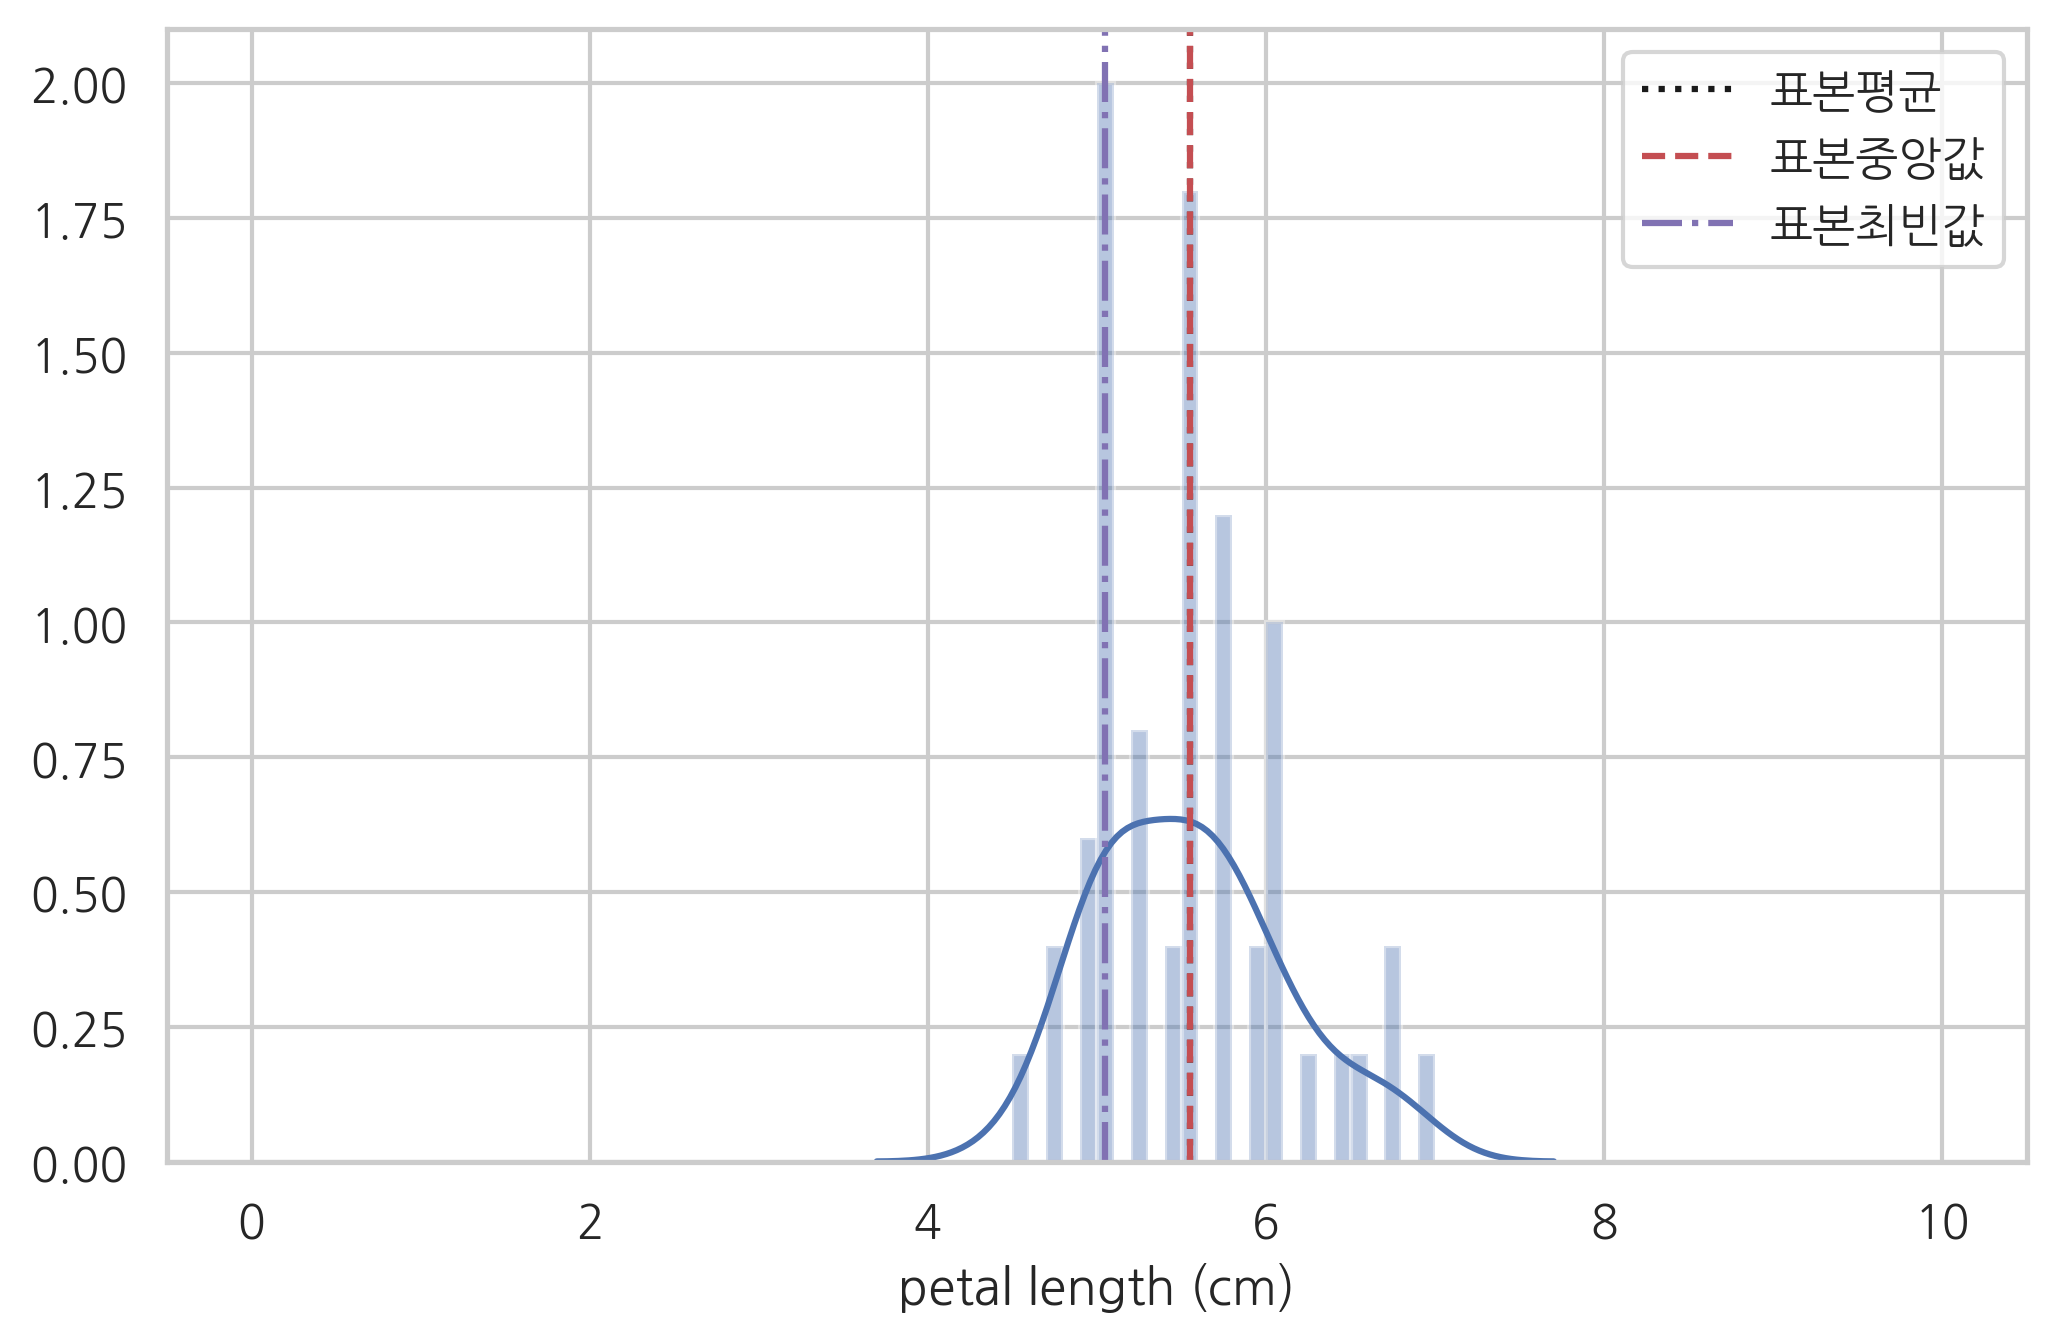

In [115]:
get_sample_mode(data2, 100)

구간의 수: 200
표본평균: 5.552, 표본중앙값: 5.55, 표본최빈값: 5.075000000000001


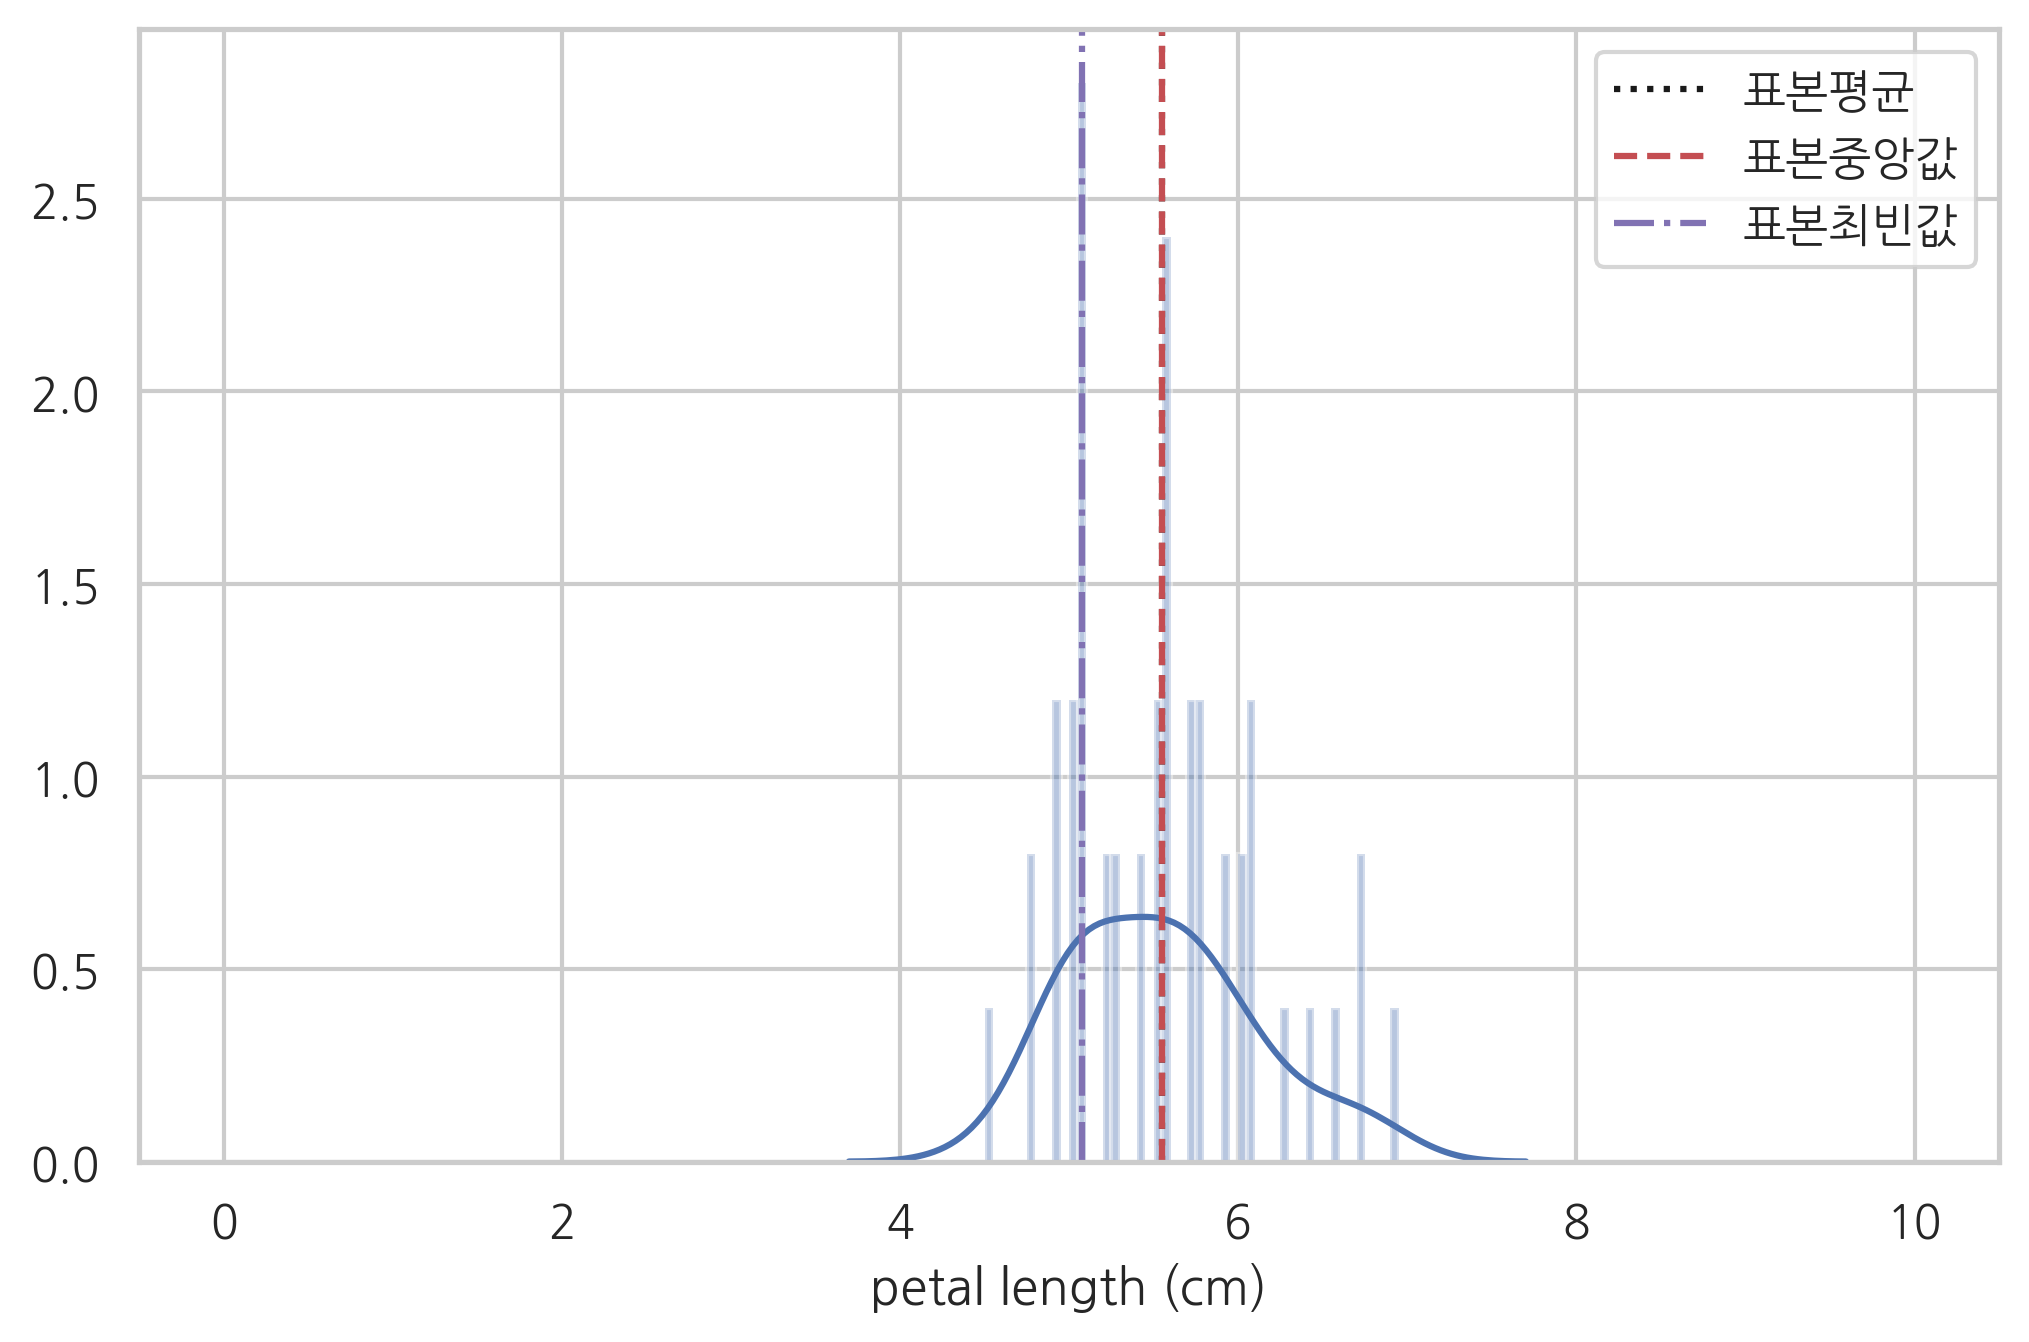

In [116]:
get_sample_mode(data2, 200)

- 표본분산 및 표본표준편차 계산

In [117]:
sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000) 
# 평균 0, 표준편차 2인 정규분포

In [119]:
print(f'편향표본분산: {np.var(x)}, 표본표준편차: {np.std(x)}')

편향표본분산: 3.896937825248617, 표본표준편차: 1.9740663173380515


In [120]:
print(f'비편향표본분산: {np.var(x, ddof=1)}, 표본표준편차: {np.std(x, ddof=1)}')

비편향표본분산: 3.900838663912529, 표본표준편차: 1.9750540913890255


In [122]:
# 연습문제 7.1.3 다우지수 일간수익률 데이터
import pandas_datareader.data as web

df = web.DataReader("DJCA", data_source='fred').dropna()["DJCA"]
r = np.log(df / df.shift(1)).dropna().values

In [125]:
print(f'표본평균: {np.mean(r)}\n표본분산: {np.var(r)}\n표본표준편차: {np.std(r)}')

표본평균: 0.00031657416384328076
표본분산: 6.409258613615313e-05
표본표준편차: 0.00800578454220154


In [127]:
volatility = np.std(r) * np.sqrt(256) * 100
print(f'연간변동성: {volatility} %')

연간변동성: 12.809255267522465 %
